<a href="https://colab.research.google.com/github/Chaitanya-Shinde/ML_Model/blob/main/Product_Demand_Predictor_Using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Product demand prediction using Decision Tree algorithm
### Chaitanya Shinde
### Seat no -37

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Download the dataset from:

[This Kaggle Link](https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset/data?select=Amazon-Products.csv)





In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### importing dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Amazon-Products.csv")

### sampling the dataset and making it shorter

In [ ]:
# Randomly sample 200000 records
dataset = dataset.sample(n=200000, random_state=42)

### Dropping index column and resetting index

In [ ]:
dataset.reset_index(drop=True, inplace=True)
dataset['index'] = dataset.index

### data exploration

In [ ]:
dataset.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,index
0,8994,MyBlush Women Top,women's clothing,Western Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MyBlush-Womens-Solid-Cla...,3.5,9,₹699,"₹2,299",0
1,6994,Ridhi Home & Decor Brass Decorative Weighing S...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Brass-Decorative-Weighin...,3.7,64,₹380,₹500,1
2,7494,Rangshaily Men's Black White Floral Print Full...,men's clothing,Shirts,https://m.media-amazon.com/images/I/51oiWRu+Gp...,https://www.amazon.in/Rangshaily-Regular-Flora...,NaN,NaN,₹649,₹999,2
3,5066,Adidas Men's Ellipto Run M Leather Shoe,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/71RsZ19e-w...,https://www.amazon.in/Adidas-Ellipto-Running-D...,3.6,23,"₹1,274","₹2,499",3
4,14687,JJ TEES Polyester Half Sleeve Jersey with Roun...,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/JJ-TEES-Polyester-Sleeve...,3.5,10,₹345,₹999,4


In [ ]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dataset.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'index'],
      dtype='object')

In [ ]:
dataset.tail()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,index
199995,Shomex 8 X 10.5 FT Black Backdrop Background R...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SHOMEX-Black-Background-...,3.5,17,₹379,₹899,199995
199996,M Men Style Shree Ram Bhakat Panchmukhi Lord M...,accessories,Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Men-Style-Panchmukhi-Baj...,NaN,NaN,₹199,₹799,199996
199997,Linen Club Brown Checked Regular Fit Pure Line...,men's clothing,Shirts,https://m.media-amazon.com/images/I/71vZCNisFk...,https://www.amazon.in/Linen-Club-Brown-Checked...,NaN,NaN,"₹2,319","₹2,899",199997
199998,Prolific Men's Casual Sneakers,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/51+UWM48D5...,https://www.amazon.in/Prolific-Mens-Casual-Sne...,2.7,32,₹748,"₹2,099",199998
199999,"Arpita Gems, 9.25 Ratti Zambian Quality Natura...",accessories,Jewellery,https://m.media-amazon.com/images/I/51k7sE-TKE...,https://www.amazon.in/Arpita-Gems-SERTIFIED-Or...,NaN,NaN,"₹3,579","₹8,290",199999


In [ ]:
dataset.shape

(200000, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            200000 non-null  object
 1   main_category   200000 non-null  object
 2   sub_category    200000 non-null  object
 3   image           200000 non-null  object
 4   link            200000 non-null  object
 5   ratings         136164 non-null  object
 6   no_of_ratings   136164 non-null  object
 7   discount_price  177587 non-null  object
 8   actual_price    193460 non-null  object
 9   index           200000 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 15.3+ MB


In [ ]:
dataset['name'].unique()

array(['MyBlush Women Top',
       'Ridhi Home & Decor Brass Decorative Weighing Scale Set, 10 g (Golden and Brown)',
       "Rangshaily Men's Black White Floral Print Fullsleeves Premium Cotton Regular Fit Shirt with Spread Collar",
       ...,
       'Linen Club Brown Checked Regular Fit Pure Linen Shirt for Men',
       "Prolific Men's Casual Sneakers",
       'Arpita Gems, 9.25 Ratti Zambian Quality Natural Emerald (Panna) Original Certified Precious Loose Gemstone AAA++ Quality'],
      dtype=object)

In [ ]:
dataset.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'index'],
      dtype='object')

### dropping any null values

In [ ]:
dataset.dropna(inplace=True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123241 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            123241 non-null  object
 1   main_category   123241 non-null  object
 2   sub_category    123241 non-null  object
 3   image           123241 non-null  object
 4   link            123241 non-null  object
 5   ratings         123241 non-null  object
 6   no_of_ratings   123241 non-null  object
 7   discount_price  123241 non-null  object
 8   actual_price    123241 non-null  object
 9   index           123241 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 10.3+ MB


In [ ]:
dataset.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'index'],
      dtype='object')

### data preprocessing

In [ ]:
# Replace non-numeric values in 'ratings' with NaN, then convert to float
dataset['ratings'] = pd.to_numeric(dataset['ratings'], errors='coerce').astype(float)

In [ ]:
dataset['discount_price'] = dataset['discount_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
dataset['actual_price'] = dataset['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

In [ ]:
dataset['no_of_ratings'] = pd.to_numeric(dataset['no_of_ratings'].replace(',', ''), errors='coerce').fillna(0).astype(int)

In [ ]:
dataset['no_of_ratings'] = dataset['no_of_ratings'].replace('.','').astype(int)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
dataset['main_category_encoded'] = label_encoder.fit_transform(dataset['main_category'])
dataset['sub_category_encoded'] = label_encoder.fit_transform(dataset['sub_category'])

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(121110, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121110 entries, 0 to 199998
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   121110 non-null  object 
 1   main_category          121110 non-null  object 
 2   sub_category           121110 non-null  object 
 3   image                  121110 non-null  object 
 4   link                   121110 non-null  object 
 5   ratings                121110 non-null  float64
 6   no_of_ratings          121110 non-null  int64  
 7   discount_price         121110 non-null  float64
 8   actual_price           121110 non-null  float64
 9   index                  121110 non-null  int64  
 10  main_category_encoded  121110 non-null  int64  
 11  sub_category_encoded   121110 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 12.0+ MB


### creating new discount_percent feature and separating categorical and numerical features

In [ ]:

# Feature Engineering
dataset['discount_percent'] = (dataset['actual_price'] - dataset['discount_price']) * 100 / dataset['actual_price']

# Feature and Target Selection
categorical_features = ['main_category_encoded', 'sub_category_encoded']
numerical_features = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_percent']

In [ ]:
# Standardize Numerical Data
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(dataset[numerical_features])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_features)


### creating X and y set

In [ ]:
# Combine Features
X = pd.concat([numerical_df, dataset[categorical_features].reset_index(drop=True)], axis=1)
y = dataset['no_of_ratings']

### Splitting X and y set into training and testing set

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,ratings,no_of_ratings,discount_price,actual_price,discount_percent,main_category_encoded,sub_category_encoded
7200,0.908595,-0.476847,-0.172014,-0.004444,1.167750,0,15
94257,0.511252,-0.488915,0.838377,0.040485,-0.667375,1,1
114251,-0.150987,-0.108759,-0.245718,-0.014470,1.272917,18,28
46919,-0.018539,4.640172,-0.196664,-0.010703,0.889447,10,87
4168,0.113909,-0.380299,-0.257164,-0.018669,0.426658,17,20
...,...,...,...,...,...,...,...
110268,-0.283434,-0.464778,0.069863,0.004080,0.005735,10,61
119879,-1.078121,-0.181170,-0.232637,-0.014117,1.033946,11,91
103694,-0.283434,-0.054451,-0.217920,-0.014117,0.710611,17,19
860,0.643700,0.820511,1.672297,0.149190,0.421140,14,26


In [ ]:
X_test

,ratings,no_of_ratings,discount_price,actual_price,discount_percent,main_category_encoded,sub_category_encoded
9286,-1.607911,-0.470812,-0.242611,-0.012410,1.447218,0,108
68282,-1.078121,-0.368231,-0.232637,-0.015824,0.657423,4,24
61647,-0.018539,-0.464778,-0.219392,-0.016962,-0.223779,6,54
55481,-1.078121,-0.476847,-0.265339,-0.019523,0.295350,10,97
35831,-0.283434,-0.205307,-0.257818,-0.015824,1.376830,18,28
...,...,...,...,...,...,...,...
67073,1.570833,-0.476847,-0.159383,-0.010157,0.423385,14,93
112383,0.246356,-0.434607,-0.231002,-0.015824,0.610708,18,28
111760,-0.150987,-0.452710,-0.224461,-0.015824,0.423849,0,108
4243,1.570833,-0.482881,1.955012,0.071024,-1.651839,0,44


### Training decision tree model

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


### evaluating the model

In [ ]:
# Evaluation
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)


In [ ]:

print(f"Decision Tree - MAE: {dt_mae}, RMSE: {dt_rmse}, R²: {dt_r2}")

Decision Tree - MAE: 0.0003715630418627694, RMSE: 0.019275970581601576, R²: 0.9999999868725878


### visualizing the decision tree

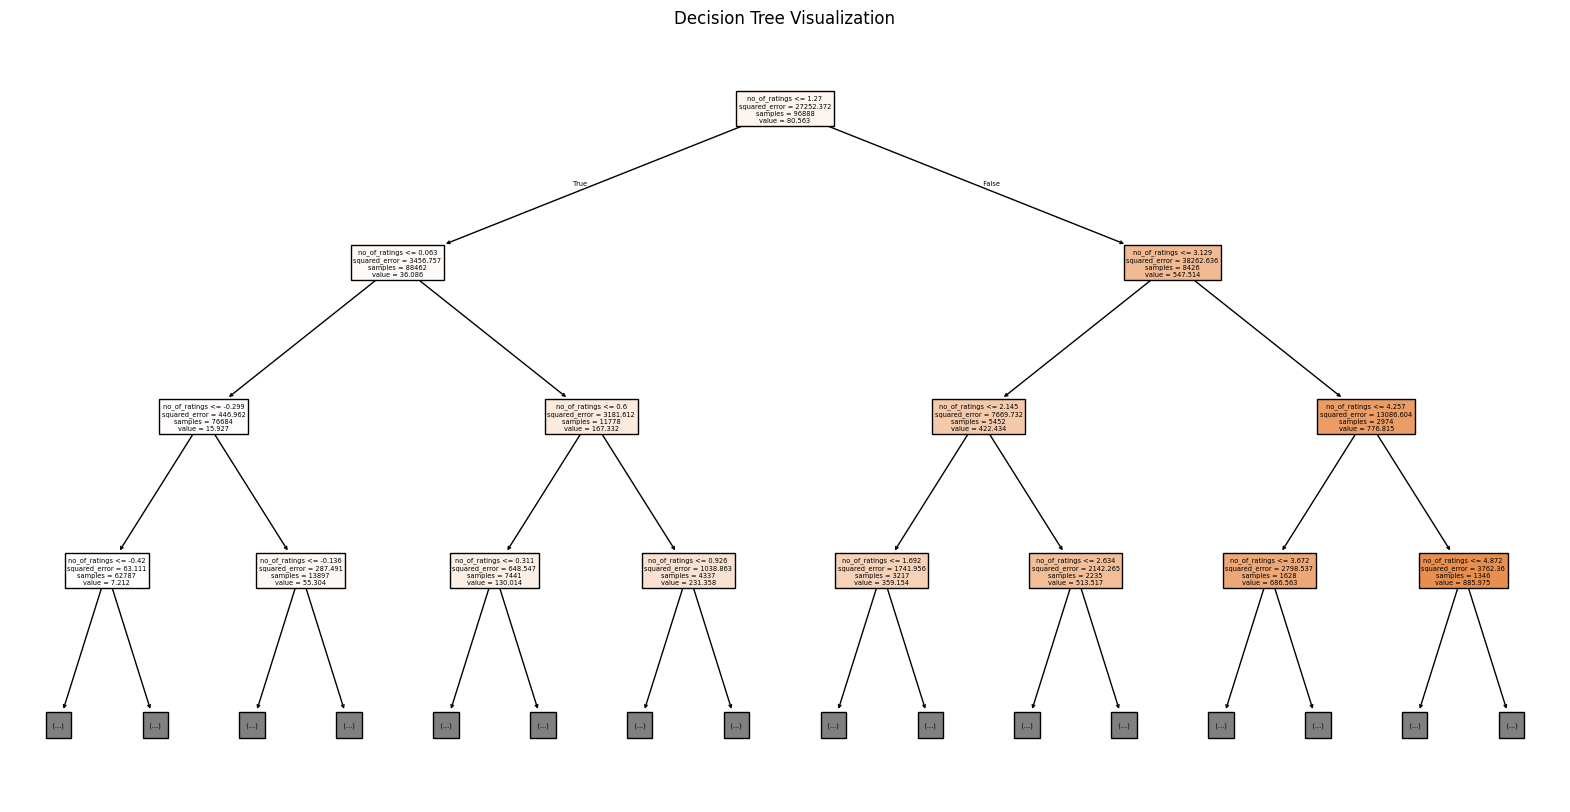

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

### using the model to predict demand for a product

In [ ]:
# Predict Demand for a Specific Product
sample_index = X_test.index[0]  # Get index from X_test
sample_input = X_test.loc[[sample_index]]
predicted_demand_dt = dt_model.predict(sample_input)

# Get the original index of this sample from the dataset
# The following line is modified to avoid the IndexError
original_index = dataset.index[dataset.index == sample_index].values[0] if len(dataset.index[dataset.index == sample_index]) > 0 else None


# Check if original_index is found, otherwise handle the case
if original_index is not None:
    predicted_product = dataset.loc[original_index, 'name']
    print(f"Decision Tree - Predicted Demand for {predicted_product}: {predicted_demand_dt[0]:.2f} ratings")
else:
    print(f"Sample index {sample_index} not found in the original dataset.")

all_predicted_demands = y_pred_dt
highest_demand_index = np.argmax(all_predicted_demands)
product_with_highest_demand = dataset.loc[highest_demand_index, 'name']
highest_demand_value = all_predicted_demands[highest_demand_index]
# Print the product with the highest demand
print(f"\nProduct with Highest Predicted Demand: {product_with_highest_demand}, Predicted Demand: {all_predicted_demands[highest_demand_index]:.2f} ratings")

Decision Tree - Predicted Demand for Nivah Fashion Women's Net Embroidery Stone Work Saree With Blouse Piece: 3.00 ratings

Product with Highest Predicted Demand: Yantralay Silicone Lanyard Sleeve Protective Cover & Silicone Lens Cap Compatible with GoPro Hero 9 Black Action Camera Ac..., Predicted Demand: 998.00 ratings
